In [8]:
import uclchem, os, constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

myCmap=sns.diverging_palette(170, 330, l=65, center="dark", as_cmap=True)

In [9]:
def makeDataframe(filePath: str, tdf):
    df = uclchem.analysis.read_output_file(filePath)
    fName=filePath.split('/')
    df['runName']=fName[-1]

    for prop in tdf.columns:
        if prop == constants.SHOCKVEL: df[prop]=tdf.at[filePath,prop]
    return df

In [56]:
def corrGrid(df, xaxis, yaxis, tipo: str, barrera=0):
    if xaxis==yaxis: singleAxis=True
    else: singleAxis=False

    if singleAxis:
        cor = df.loc[:,xaxis].corr()
        cor=cor[cor.abs().ge(barrera)].dropna(how='all')
    else:
        cor = df.loc[:,xaxis+yaxis].corr()
        cor=cor[cor.abs().ge(barrera)].loc[:,xaxis][len(yaxis):].dropna(how='all')

    fig = plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap=myCmap, linewidths=.5)
    ax.set_title(tipo.upper())
    return fig

In [12]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Grid/{}/{}/'
runs = {constants.SHOCK: '2024-07-01_124848', constants.HOTCORE: '2024-07-01_134429'}

tipo=constants.HOTCORE

tdf= pd.read_csv(folder.format(runs[tipo], "stage2_df.csv")[:-1], index_col=0)
tdf.index = tdf['outputFile']
li=[f for f in os.listdir(folder.format(runs[tipo], constants.PHASE2)) if 'startcollapse' not in f]
df = pd.concat([makeDataframe(folder.format(runs[tipo], constants.PHASE2)+gg, tdf) for gg in li])
df=df.reset_index()
df.pop('index')

df.to_csv(tipo+'.csv')

# tmp

In [4]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Grid/{}/{}/'
species=['#CH3OH', 'CH3OH', '@CH3OH', '#SIO', 'SIO', '@SIO']
logspecies= [f'{prop}_log' for prop in species]

runs = {constants.SHOCK: '2024-07-01_124848', constants.HOTCORE: '2024-07-01_134429'}
logscales = [[False, False], [True, False], [False, True], [True, True]]

singleAxis= True

In [5]:
tipo=constants.SHOCK
physical=['Time', 'Density', 'gasTemp', 'av', 'zeta', 'radfield']
logphysical= [f'{prop}_log' for prop in physical]
if tipo == constants.SHOCK: physical.append(constants.SHOCKVEL)

In [6]:
tdf= pd.read_csv(folder.format(runs[tipo], "stage2_df.csv")[:-1], index_col=0)
tdf.index = tdf['outputFile']
li=[f for f in os.listdir(folder.format(runs[tipo], constants.PHASE2)) if 'startcollapse' not in f]
df = pd.concat([makeDataframe(folder.format(runs[tipo], constants.PHASE2)+gg, tdf) for gg in li])
df=df.reset_index()
df.pop('index')
df = df.loc[:,physical+species+['runName']]
for prop in physical+species:
    with np.errstate(divide='ignore'): df[f'{prop}_log']=np.log10(df[prop])

In [ ]:
for logxscale, logyscale in logscales:
    xaxis= logspecies if logxscale else species
    if singleAxis: yaxis= logspecies if logyscale else species
    else: yaxis= logphysical if logyscale else physical

    corrGrid(df.loc[:,yaxis+xaxis], xaxis, yaxis, tipo, logxscale, logyscale, 0, singleAxis)
    corrGrid(df.loc[:,yaxis+xaxis], xaxis, yaxis, tipo, logxscale, logyscale, 0.5, singleAxis)

#

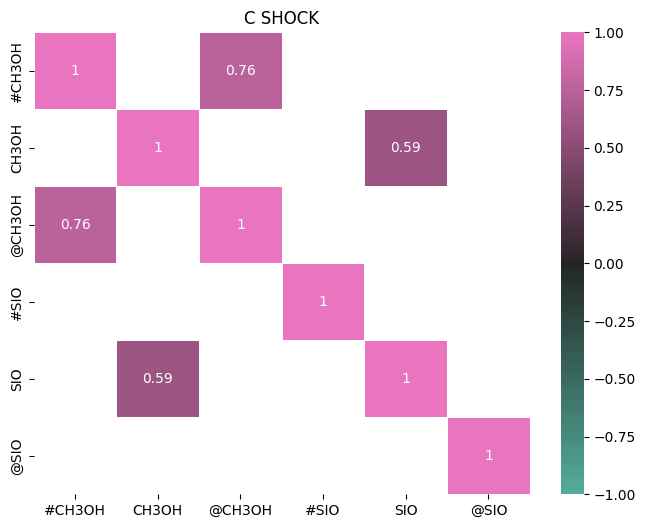

In [60]:
logxscale=False
logyscale=False

singleAxis=True

xaxis= logspecies if logxscale else species
if singleAxis: yaxis= logspecies if logyscale else species
else: yaxis= logphysical if logyscale else physical

corrGrid(df, xaxis, yaxis, tipo, 0.5);

In [1]:
dicti={
        'xaxis': ['@CH3OH','@CH3OH','zeta','zeta','CH3OH','gasTemp','gasTemp','gasTemp','gasTemp','gasTemp','#CH3OH','#CH3OH','#CH3OH','#CH3OH','#CH3OH','#SIO','#SIO','Time','Time','Time'],
        'xlog': ['log','log',False,'log','log',False,False,'log','log','log','log','log','log','log','log','log','log',False,False,'log'],
        'yaxis': ['@SIO','#SIO','@SIO','CH3OH','#SIO','SIO','#CH3OH','#SIO','@SIO','@CH3OH','#SIO','@SIO','@CH3OH','CH3OH','SIO','@SIO','SIO','#CH3OH','@CH3OH','SIO'],
        'ylog': ['log','log',False,'log','log',False,'log','log','log',False,'log','log','log',False,'log','log','log','log','log','log']
    }

In [5]:
for keys, values in dicti:
    print(keys)

ValueError: too many values to unpack (expected 2)